In [2]:
import pandas as pd
from prophet import Prophet
from data_preparation import *
from missing_timestamps import remove_duplicates, missing_data
from functions import *

In [3]:
data = Preparation(r'/home/iva/Desktop/operato-meteo-1/data/MAS_processed/ELES-MAS-5001.csv.gz', "AMBIENT_TEMPERATURE")
train, test = data.split()
train_processed = remove_duplicates(train)
missing_timestamps_train, missing_values_filled_previous_train = missing_data(train_processed)
test_processed = remove_duplicates(test)
missing_timestamps_test, missing_values_filled_previous_test = missing_data(test_processed)

In [10]:
test_processed.index


DatetimeIndex(['2023-01-01 00:20:00', '2023-01-01 00:25:00',
               '2023-01-01 00:30:00', '2023-01-01 00:35:00',
               '2023-01-01 00:40:00', '2023-01-01 00:45:00',
               '2023-01-01 00:50:00', '2023-01-01 00:55:00',
               '2023-01-01 01:00:00', '2023-01-01 01:05:00',
               ...
               '2023-05-31 21:10:00', '2023-05-31 21:15:00',
               '2023-05-31 21:20:00', '2023-05-31 21:25:00',
               '2023-05-31 21:30:00', '2023-05-31 21:35:00',
               '2023-05-31 21:40:00', '2023-05-31 21:45:00',
               '2023-05-31 21:50:00', '2023-05-31 21:55:00'],
              dtype='datetime64[ns]', name='timestamp', length=43011, freq=None)

In [12]:
test_prophet = pd.DataFrame()
test_prophet["ds"] = test_processed.index
test_prophet

,ds
0,2023-01-01 00:20:00
1,2023-01-01 00:25:00
2,2023-01-01 00:30:00
3,2023-01-01 00:35:00
4,2023-01-01 00:40:00
...,...
43006,2023-05-31 21:35:00
43007,2023-05-31 21:40:00
43008,2023-05-31 21:45:00
43009,2023-05-31 21:50:00


In [7]:
train_prophet = pd.DataFrame()
train_prophet["ds"] = train_processed.index
train_prophet["y"] = train_processed["AMBIENT_TEMPERATURE"].values
train_prophet

,ds,y
0,2020-10-13 10:20:00,7.4
1,2020-10-13 10:25:00,7.5
2,2020-10-13 10:30:00,7.4
3,2020-10-13 10:35:00,7.5
4,2020-10-13 10:40:00,7.6
...,...,...
228492,2022-12-31 23:35:00,0.8
228493,2022-12-31 23:40:00,1.0
228494,2022-12-31 23:45:00,0.8
228495,2022-12-31 23:50:00,0.6


In [8]:
m = Prophet()
m.fit(train_prophet)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpb8lgy5xu/b_h08fb_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb8lgy5xu/m0o8_pu_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/home/iva/anaconda3/envs/Python_3.9/lib/python3.9/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=857', 'data', 'file=/tmp/tmpb8lgy5xu/b_h08fb_.json', 'init=/tmp/tmpb8lgy5xu/m0o8_pu_.json', 'output', 'file=/tmp/tmpb8lgy5xu/prophet_model_gdnpc9_/prophet_model-20231010112124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:21:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:2                                                                                    │
│                                                                                                  │
│   1 m = Prophet()                                                                                │
│ ❱ 2 m.fit(train_prophet)                                                                         │
│   3                                                                                              │
│                                                                                                  │
│ /home/iva/anaconda3/envs/Python_3.9/lib/python3.9/site-packages/prophet/forecaster.py:1181 in    │
│ fit                                                                                              │
│                                                                                                  │
│   1178 │   │   elif self.mcmc_samples > 0:                                                       │
│   1179 │   │   │   self.params = self.stan_backend.sampling(stan_init, dat, self.mcmc_samples,   │
│   1180 │   │   else:                                                                             │
│ ❱ 1181 │   │   │   self.params = self.stan_backend.fit(stan_init, dat, **kwargs)                 │
│   1182 │   │                                                                                     │
│   1183 │   │   self.stan_fit = self.stan_backend.stan_fit                                        │
│   1184 │   │   # If no changepoints were requested, replace delta with 0s                        │
│                                                                                                  │
│ /home/iva/anaconda3/envs/Python_3.9/lib/python3.9/site-packages/prophet/models.py:90 in fit      │
│                                                                                                  │
│    87 │   │   args.update(kwargs)                                                                │
│    88 │   │                                                                                      │
│    89 │   │   try:                                                                               │
│ ❱  90 │   │   │   self.stan_fit = self.model.optimize(**args)                                    │
│    91 │   │   except RuntimeError as e:                                                          │
│    92 │   │   │   # Fall back on Newton                                                          │
│    93 │   │   │   if not self.newton_fallback or args['algorithm'] == 'Newton':                  │
│                                                                                                  │
│ /home/iva/anaconda3/envs/Python_3.9/lib/python3.9/site-packages/cmdstanpy/model.py:681 in        │
│ optimize                                                                                         │
│                                                                                                  │
│    678 │   │   │   )                                                                             │
│    679 │   │   │   dummy_chain_id = 0                                                            │
│    680 │   │   │   runset = RunSet(args=args, chains=1, time_fmt=time_fmt)                       │
│ ❱  681 │   │   │   self._run_cmdstan(                                                            │
│    682 │   │   │   │   runset,                                                                   │
│    683 │   │   │   │   dummy_chain_id,                                                           │
│    684 │   │   │   │   show_console=show_console,                                                │
│                                                                                                  │
│ /home/iva/anaconda3/envs/Python_3.9/lib/python3.9/site-pack

In [14]:
predictions = pd.read_csv("prophet_forecasts.csv")
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-01 00:20:00,11.652917,-8.230272,0.173432,11.652917,11.652917,-15.610580,-15.610580,-15.610580,-2.610531,...,-0.212877,-0.212877,-0.212877,-12.787172,-12.787172,-12.787172,0.0,0.0,0.0,-3.957664
1,2023-01-01 00:25:00,11.652916,-8.098523,0.499618,11.652916,11.652916,-15.634190,-15.634190,-15.634190,-2.632396,...,-0.214221,-0.214221,-0.214221,-12.787574,-12.787574,-12.787574,0.0,0.0,0.0,-3.981275
2,2023-01-01 00:30:00,11.652915,-7.876294,0.539010,11.652915,11.652915,-15.657832,-15.657832,-15.657832,-2.654299,...,-0.215558,-0.215558,-0.215558,-12.787975,-12.787975,-12.787975,0.0,0.0,0.0,-4.004918
3,2023-01-01 00:35:00,11.652914,-8.208476,0.224305,11.652914,11.652914,-15.681528,-15.681528,-15.681528,-2.676262,...,-0.216888,-0.216888,-0.216888,-12.788377,-12.788377,-12.788377,0.0,0.0,0.0,-4.028614
4,2023-01-01 00:40:00,11.652913,-8.424274,-0.026458,11.652913,11.652913,-15.705297,-15.705297,-15.705297,-2.698306,...,-0.218211,-0.218211,-0.218211,-12.788779,-12.788779,-12.788779,0.0,0.0,0.0,-4.052384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43006,2023-05-31 21:35:00,11.613461,-22.764899,48.072681,-26.950464,42.793842,4.316245,4.316245,4.316245,-1.728287,...,0.097939,0.097939,0.097939,5.946592,5.946592,5.946592,0.0,0.0,0.0,15.929706
43007,2023-05-31 21:40:00,11.613460,-23.014117,46.983598,-26.951476,42.794663,4.281381,4.281381,4.281381,-1.764224,...,0.098666,0.098666,0.098666,5.946939,5.946939,5.946939,0.0,0.0,0.0,15.894841
43008,2023-05-31 21:45:00,11.613459,-23.697005,47.629645,-26.952488,42.795484,4.247329,4.247329,4.247329,-1.799349,...,0.099392,0.099392,0.099392,5.947287,5.947287,5.947287,0.0,0.0,0.0,15.860789
43009,2023-05-31 21:50:00,11.613458,-23.410969,48.105656,-26.953500,42.796305,4.214068,4.214068,4.214068,-1.833683,...,0.100118,0.100118,0.100118,5.947634,5.947634,5.947634,0.0,0.0,0.0,15.827527


In [18]:
predictions["ds"] = pd.to_datetime(predictions["ds"])


In [19]:
test_processed

,AMBIENT_TEMPERATURE
timestamp,
2023-01-01 00:20:00,0.0
2023-01-01 00:25:00,0.0
2023-01-01 00:30:00,-0.0
2023-01-01 00:35:00,0.0
2023-01-01 00:40:00,0.1
...,...
2023-05-31 21:35:00,14.0
2023-05-31 21:40:00,13.9
2023-05-31 21:45:00,13.9


Text(0, 0.5, 'Temperature[°C]')

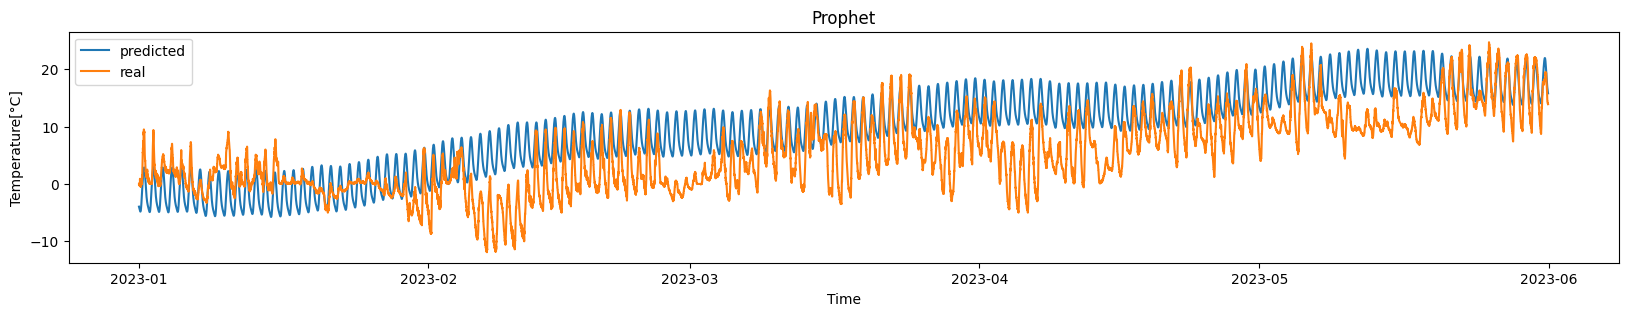

In [21]:
plt.figure(figsize=(20, 3))
plt.title("Prophet")
plt.plot(predictions["ds"], predictions["yhat"], label="predicted")
plt.plot(test_processed.index, test_processed.values, label="real")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Temperature[°C]")